In [1]:
import numpy as np
import quadpy
import matplotlib.pyplot as plt
import sympy

The function we want to integrate is:

$$f(x) = cos(x)$$

In [2]:
def f(x):
    return np.cos(x)

The definite integral of this function is:
$$\int_a^b{f(x)dx} = sin(x) \bigg\rvert_{a}^{b}$$

In [3]:
def antiderivative(x):
    return np.sin(x);

Now determine how accurate Gauss-Lobatto is for different order approximations...

In [4]:
min = 0
max = 6*np.pi

In [5]:
ns = []
integrals = []
errors = []

Text(0,0.5,'$f(x)$')

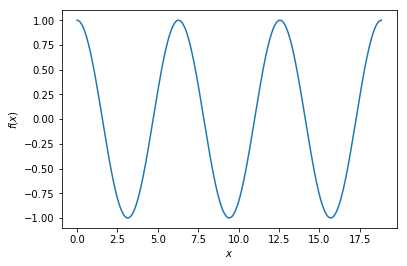

In [6]:
x = np.linspace(min, max, 1000)
plt.plot(x,f(x))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

In [7]:
def integrate(n):
    return quadpy.line_segment.integrate(
        f,
        [min, max],
        quadpy.line_segment.GaussLobatto(n)
    )

In [8]:
for n in range(2,5):
    integral = integrate(n)
    ns.append(n)
    integrals.append(integral)

Text(0,0.5,'Integral')

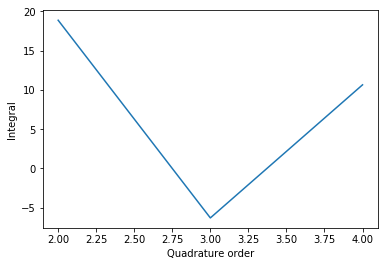

In [9]:
plt.plot(ns,integrals)
plt.xlabel('Quadrature order')
plt.ylabel('Integral')

In [10]:
exactIntegral = antiderivative(max) - antiderivative(min)

In [11]:
errors = np.array(integrals) - exactIntegral
percentageErrors = 100 * errors/exactIntegral

Text(0,0.5,'| Percentage error in integral |')

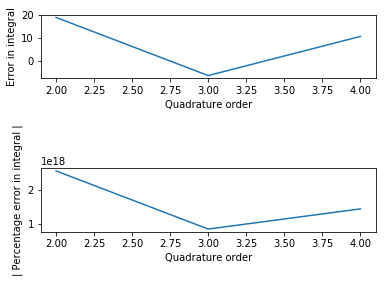

In [21]:
plt.subplot(3,1,1)
plt.plot(ns, errors)
plt.xlabel('Quadrature order')
plt.ylabel('Error in integral')

plt.subplot(3,1,3)
plt.plot(ns, np.abs(percentageErrors))
plt.xlabel('Quadrature order')
plt.ylabel('| Percentage error in integral |')